In [147]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.decomposition import PCA



# Load dataset
data = pd.read_csv('final_dataset.csv')
# Updated data for 2024 in the same format as training data
data_2024 = {
    'academicYear': [2024],
    'universityName': ['KOÇ ÜNİVERSİTESİ'],
    'universityType': ['vakıf'],
    'faculty': ['Fen Fakültesi'],
    'programType': ['SAY'],
    'departmentName': ['Fizik'],
    'idOSYM': [203910823],
    'language': ['İngilizce'],
    'scholarshipRate': [55.0],
    'quota': [8],
    'occupiedSlots': [8],
    'tuitionFee': [365000.0],
    'universityLocation': ['İSTANBUL'],
    'universityRegion': ['Marmara'],
    'profCount': [0.0],
    'assoCount': [0.0],
    'docCount': [0.0],
    'baseRanking': [21.512],  
    'topRanking': [0.950],
    'avgAdmissionRanking': [15.000],
    'baseAdmissionRanking': [35.50],
    'stdDeviationStudents': [10.9000],
    'revenue': [2900000.0],
    'outOfCityStudentRate': [6.50],
    'sameRegionStudentRate': [5],
    'totalPreference': [110],
    'top1PreferenceRatio': [1.50],
    'top3PreferenceRatio': [3.00],
    'top9PreferenceRatio': [7.60],
    'avgOrderofPreference': [78.0],
    'avgAdmittedStudentPrefOrder': [20.0],
    'top1AdmittedRatio': ['%55,0'],
    'top3AdmittedRatio': ['%90,0'],
    'top10AdmittedRatio': ['%100,0'],
    'admittedGovPref': [37.0],
    'admittedPrivPref': [37.0],
    'admittedTotalPref': [74.0],
    'admittedTotalDepartmentPref': [24.0],
    'currentStudentCount': [30.0],
    'totalForeignStudents': [640.0],
    'totalStudentNumber': [8100.0],
    'Urap_Rank': [1.0],
    'Urap_Score': [1150.00],
    'Time_for_Graduates_Find_Job': [12.5],
    'employment_rate': [80.0],
    'avg_monthly_income_group': [2.1],
}

# Convert to DataFrame
df_2024 = pd.DataFrame(data_2024)

# Append the new data to the existing dataset
data = pd.concat([data, df_2024], ignore_index=True)

# List of categorical columns to encode
categorical_columns = ['universityName', 'universityLocation', 'universityRegion', 'faculty', 'departmentName', 'language']

# Apply LabelEncoder to each categorical column
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])
    
# Convert percentage columns to float
percentage_columns = ['top1AdmittedRatio', 'top3AdmittedRatio', 'top10AdmittedRatio']
for col in percentage_columns:
    data[col] = data[col].str.replace('%', '').str.replace(',', '.').astype(float) / 100
    
# Convert categorical data
categorical_columns = ['universityType', 'programType']
data = pd.get_dummies(data, columns=categorical_columns)


# Fill missing values in the baseRanking column with the mean
data['baseRanking'] = data['baseRanking'].fillna(data['baseRanking'].mean())

# Fill with 0 for the rest of the columns
data.fillna(0, inplace=True)


# Check for missing values in each column
missing_values = data.isnull().sum()
print(missing_values)
total_missing = missing_values.sum()
print(f"Total missing values in the dataset: {total_missing}")


academicYear                   0
universityName                 0
faculty                        0
departmentName                 0
idOSYM                         0
language                       0
scholarshipRate                0
quota                          0
occupiedSlots                  0
tuitionFee                     0
universityLocation             0
universityRegion               0
profCount                      0
assoCount                      0
docCount                       0
baseRanking                    0
topRanking                     0
avgAdmissionRanking            0
baseAdmissionRanking           0
stdDeviationStudents           0
revenue                        0
outOfCityStudentRate           0
sameRegionStudentRate          0
totalPreference                0
top1PreferenceRatio            0
top3PreferenceRatio            0
top9PreferenceRatio            0
avgOrderofPreference           0
avgAdmittedStudentPrefOrder    0
top1AdmittedRatio              0
top3Admitt

In [148]:
# Ensure all numeric columns are properly formatted
# exclude_columns = ['universityType_devlet', 'universityType_vakıf', 'programType_DİL', 'programType_EA', 'programType_SAY', 'programType_SÖZ']

non_numeric_columns = data.select_dtypes(exclude=['number']).columns

print("Non-numeric columns before conversion:", non_numeric_columns)
print(data[non_numeric_columns].head())
print(data[non_numeric_columns].dtypes)

Non-numeric columns before conversion: Index(['baseAdmissionRanking', 'outOfCityStudentRate', 'sameRegionStudentRate',
       'Time_for_Graduates_Find_Job', 'employment_rate',
       'universityType_devlet', 'universityType_vakıf', 'programType_DİL',
       'programType_EA', 'programType_SAY', 'programType_SÖZ'],
      dtype='object')
  baseAdmissionRanking outOfCityStudentRate sameRegionStudentRate  \
0              112.334                 7.22                  5.83   
1              112.334                 7.22                  5.83   
2              114.126                 6.49                   5.2   
3              114.126                 6.49                   5.2   
4              158.876                 6.75                   5.2   

  Time_for_Graduates_Find_Job employment_rate  universityType_devlet  \
0                        11.2            90.1                   True   
1                        11.2            90.1                   True   
2                        11.2   

Conversion of Non-Numeric Columns

In [149]:

# Convert non-numeric columns to numeric, coerce errors to NaN, and fill NaN with 0
data[non_numeric_columns] = data[non_numeric_columns].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

# Verify conversion
non_numeric_columns_after = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns after conversion:", non_numeric_columns_after)

Non-numeric columns after conversion: Index([], dtype='object')


In [ ]:
target_column = 'baseRanking'  # Replace with the actual target column name if different
y = data[target_column]
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
data.head()


,academicYear,universityName,faculty,departmentName,idOSYM,language,scholarshipRate,quota,occupiedSlots,tuitionFee,...,Urap_Score,Time_for_Graduates_Find_Job,employment_rate,avg_monthly_income_group,universityType_devlet,universityType_vakıf,programType_DİL,programType_EA,programType_SAY,programType_SÖZ
0,-1.277843,-1.773883,-0.110501,-1.602568,-0.788597,1.246844,-0.673164,0.280601,0.325831,-0.369253,...,-0.165612,0.247925,0.962052,1.757206,0.804136,-0.804136,-0.232595,-0.684836,1.089117,-0.455759
1,-1.277843,-1.773883,-0.110501,-1.602568,-0.788597,1.246844,-0.673164,0.280601,0.325831,-0.369253,...,-0.165612,0.247925,0.962052,1.757206,0.804136,-0.804136,-0.232595,-0.684836,1.089117,-0.455759
2,-0.050644,-1.773883,-0.110501,-1.602568,-0.788597,1.246844,-0.673164,0.340447,0.387371,-0.369253,...,0.710566,0.247925,0.962052,1.757206,0.804136,-0.804136,-0.232595,-0.684836,1.089117,-0.455759
3,-0.050644,-1.773883,-0.110501,-1.602568,-0.788597,1.246844,-0.673164,0.340447,0.387371,-0.369253,...,0.710566,0.247925,0.962052,1.757206,0.804136,-0.804136,-0.232595,-0.684836,1.089117,-0.455759
4,1.176554,-1.773883,-0.110501,-1.602568,-0.788597,1.246844,-0.673164,0.340447,0.387371,-0.369253,...,0.663258,0.103038,0.962052,1.757206,0.804136,-0.804136,-0.232595,-0.684836,1.089117,-0.455759


Seperate 2024 Data After Scaling

In [150]:
scaled_2024_data = data.iloc[-1:, :]  # Select the last row, which is the 2024 data
data = data.iloc[:-1, :]
print(scaled_2024_data)

       academicYear  universityName  faculty  departmentName     idOSYM  \
54496          2024              97       89             200  203910823   

       language  scholarshipRate  quota  occupiedSlots  tuitionFee  ...  \
54496        12             55.0      8              8    365000.0  ...   

       Urap_Score  Time_for_Graduates_Find_Job  employment_rate  \
54496      1150.0                           12               80   

       avg_monthly_income_group  universityType_devlet  universityType_vakıf  \
54496                       2.1                      0                     1   

       programType_DİL  programType_EA  programType_SAY  programType_SÖZ  
54496                0               0                1                0  

[1 rows x 50 columns]


In [151]:
# data.to_csv('raw_data.csv', index=False)
# Define target column
exclude_columns = ['baseRanking', 'baseAdmissionRanking', 'avgAdmissionRanking', 'topRanking', 'stdDeviationStudents']

# Ensure the target column is not included in the features
X = data.drop(exclude_columns, axis=1)
X_2024 = scaled_2024_data.drop(exclude_columns, axis=1)

data.head()
missing_values = X.isnull().sum()
print(missing_values)
print(np.isinf(X).sum())



academicYear                   0
universityName                 0
faculty                        0
departmentName                 0
idOSYM                         0
language                       0
scholarshipRate                0
quota                          0
occupiedSlots                  0
tuitionFee                     0
universityLocation             0
universityRegion               0
profCount                      0
assoCount                      0
docCount                       0
revenue                        0
outOfCityStudentRate           0
sameRegionStudentRate          0
totalPreference                0
top1PreferenceRatio            0
top3PreferenceRatio            0
top9PreferenceRatio            0
avgOrderofPreference           0
avgAdmittedStudentPrefOrder    0
top1AdmittedRatio              0
top3AdmittedRatio              0
top10AdmittedRatio             0
admittedGovPref                0
admittedPrivPref               0
admittedTotalPref              0
admittedTo

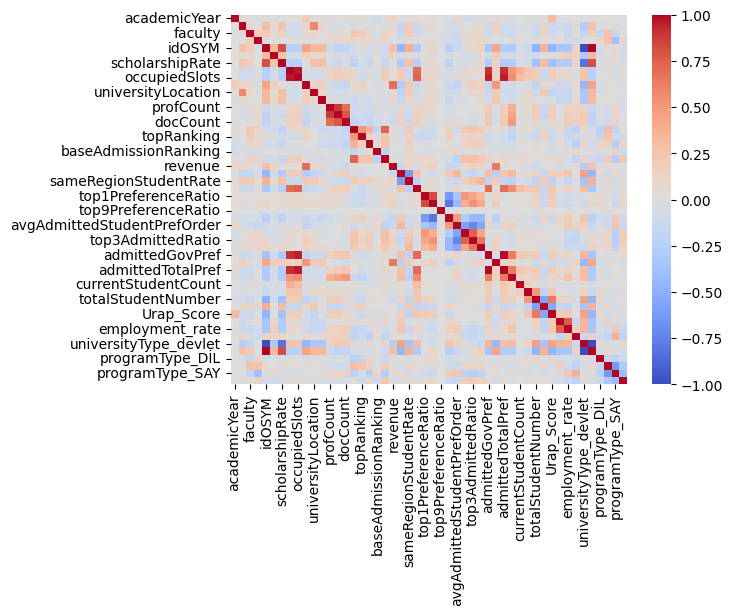

Highly correlated features: {'docCount', 'top3AdmittedRatio', 'programType_SAY', 'totalPreference', 'stdDeviationStudents', 'avgOrderofPreference', 'top3PreferenceRatio', 'revenue', 'sameRegionStudentRate', 'admittedGovPref', 'admittedTotalDepartmentPref', 'assoCount', 'Urap_Score', 'admittedTotalPref', 'admittedPrivPref', 'universityType_devlet', 'employment_rate', 'universityType_vakıf', 'occupiedSlots', 'top10AdmittedRatio', 'scholarshipRate'}


In [154]:
# Compute correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

# Drop highly correlated features (e.g., correlation > 0.9)
correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.6:
            colname = corr_matrix.columns[i]
            correlated_features.add(colname)
print(f"Highly correlated features: {correlated_features}")
cov_test = data.drop(columns=correlated_features)

RFE TO SELECT FEATURES 

Selected Features: Index(['scholarshipRate', 'avgOrderofPreference', 'top3AdmittedRatio',
       'admittedGovPref', 'admittedPrivPref', 'admittedTotalPref',
       'admittedTotalDepartmentPref', 'Time_for_Graduates_Find_Job',
       'employment_rate', 'universityType_devlet', 'universityType_vakıf',
       'programType_DİL', 'programType_EA', 'programType_SAY',
       'programType_SÖZ'],
      dtype='object')


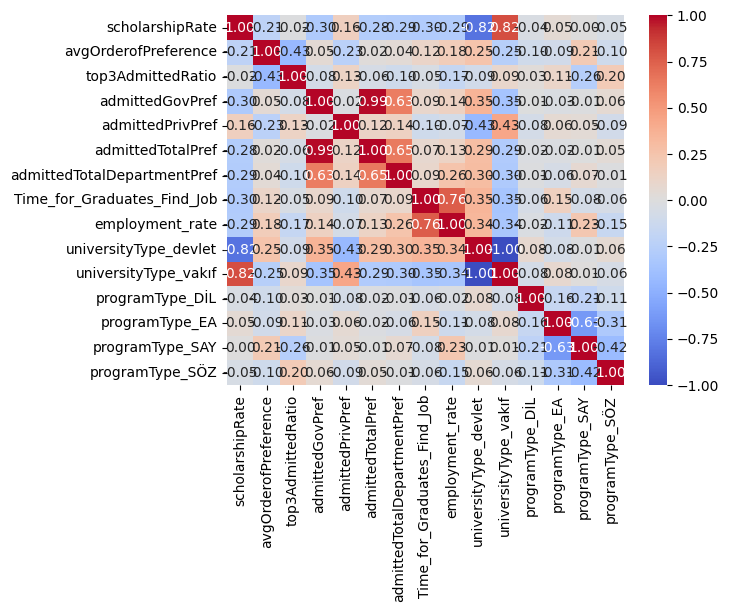

In [104]:
# Initialize the regressor and RFE
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)  # Replace NaN with 0 (required for RFE)

model = LinearRegression()
selector = RFE(model, n_features_to_select=15)  
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.support_]

print("Selected Features:", selected_features)
X_selected_df = pd.DataFrame(X_selected, columns=selected_features)
# Compute correlation matrix
corr_matrix = X_selected_df.corr()

# Plot the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [142]:
# Full pipeline with preprocessor and regressor
model_pipeline = Pipeline(steps=[
    ('regressor', RandomForestRegressor(random_state=42))
])

CROSS VALIDATION

In [57]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores.mean():.2f}")

Cross-validation MSE: 0.32


In [63]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_pipeline, X, y, cv=3, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores.mean():.2f}")

Cross-validation MSE: 0.34


CROSS VALIDATION AFTER RFE

In [55]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_pipeline, X_selected, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores.mean():.2f}")

Cross-validation MSE: 0.60


After RFE MSE is higher 

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Train the model
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

ValueError: Found input variables with inconsistent numbers of samples: [54496, 54497]

In [ ]:

# Full pipeline with preprocessor and Ridge regressor
ridge_pipeline = Pipeline(steps=[
    ('regressor', Ridge(alpha=1.0, random_state=42)) 
    # Adjust alpha for regularization strength
])

In [75]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
ridge_pipeline.fit(X_train, y_train)

# Predict
y_pred = ridge_pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Ridge Regression Mean Squared Error: {mse:.2f}")

Ridge Regression Mean Squared Error: 0.55


PCA

In [68]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=5)  # Select top 5 components
X_pca = pca.fit_transform(X)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.17465423 0.1093096  0.08823044 0.06613391 0.05184861]


In [ ]:
# Full pipeline with preprocessor and regressor
model_pipeline_pca = Pipeline(steps=[
    ('pca', PCA(n_components=5)),  # Apply PCA to reduce to 5 components
    ('regressor', RandomForestRegressor(random_state=42))
])

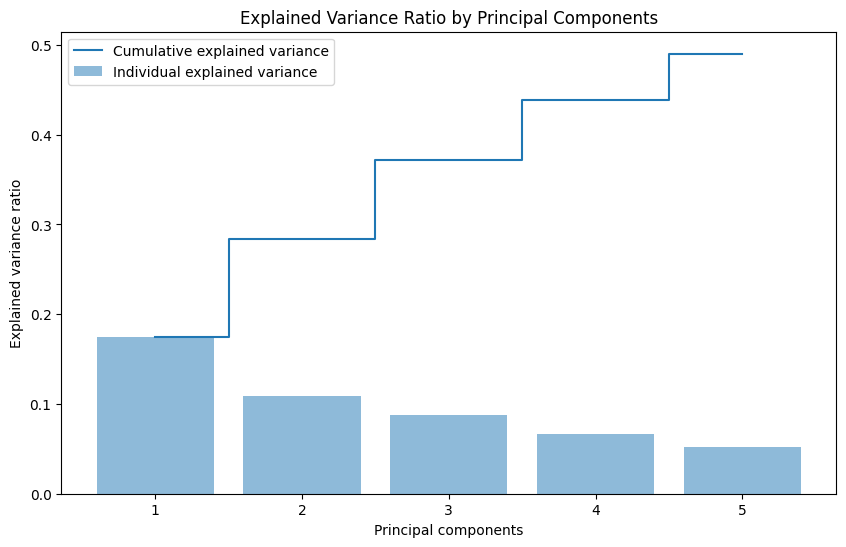

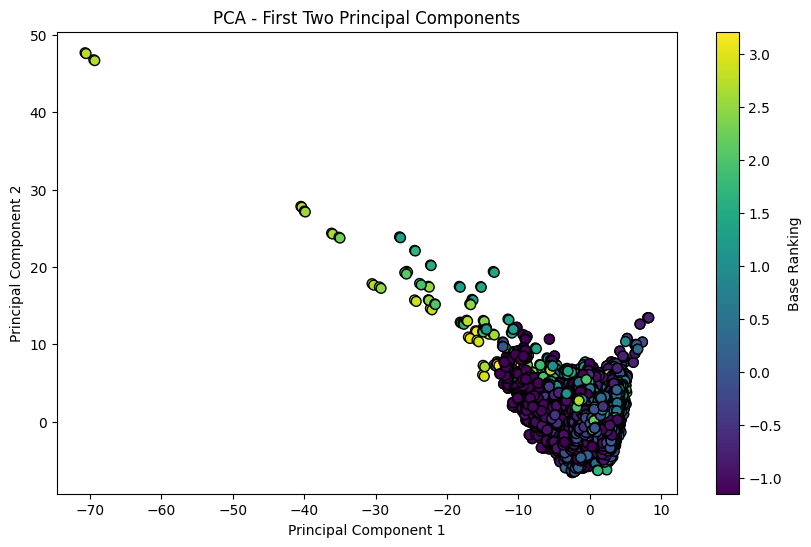

In [69]:
# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.title('Explained Variance Ratio by Principal Components')
plt.show()

# Visualize the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.colorbar(label='Base Ranking')
plt.show()

Linear Regression with PCA

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.82


RandomForestRegressor with PCA

In [129]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the model
model_pipeline_pca.fit(X_train, y_train)

y_pred = model_pipeline_pca.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.32


Cross Validation After PCA

In [74]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model_pipeline, X_pca, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE: {-cv_scores.mean():.2f}")

Cross-validation MSE: 0.64


2024 Prediction RandomForestRegression

In [133]:
predictions_2024 = model_pipeline.predict(X_2024)
print(f"Predicted base ranking for 2024 with RandomForestRegression: {predictions_2024[0]:.2f}")


/Users/omeryildiz/Documents/GitHub/WebScraping-Dataset-/.venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


ValueError: X has 45 features, but RandomForestRegressor is expecting 5 features as input.

2024 Prediction RandomForestRegression and PCA

In [132]:
predictions_2024 = model_pipeline_pca.predict(X_2024)
print(f"Predicted base ranking for 2024 with PCA and RandomForestRegression: {predictions_2024[0]:.2f}")



Predicted base ranking for 2024 with PCA and RandomForestRegression: -0.98
